In [9]:
from npl.core import Nanoparticle
from npl.descriptors.local_environment_feature_classifier import LocalEnvironmentFeatureClassifier
from npl.calculators import BayesianRRCalculator
from npl.descriptors.global_feature_classifier import testTopologicalFeatureClassifier
from npl.utils.utils import plot_cummulative_success_rate
from ase.visualize import view

In [10]:
"""Create one randomly ordered start particle"""

def create_start_particle(height, trunc, stoichiometry):
    start_particle = Nanoparticle()
    start_particle.truncated_octahedron(height, trunc, stoichiometry)
    return start_particle

In [11]:
from npl.calculators.energy_calculator import compute_coefficients_for_linear_topological_model
from npl.calculators import BayesianRRCalculator

global_energy_calculator = BayesianRRCalculator.load('bayesian_rr_calculator.pkl')
global_topological_coefficients = global_energy_calculator.get_coefficients()
print(global_topological_coefficients)
symbols = ['Au', 'Pt']
n_atoms = 79
coefficients, total_energies = compute_coefficients_for_linear_topological_model(
    global_topological_coefficients,
    symbols, n_atoms)

energy_calculator = BayesianRRCalculator('TEC')
energy_calculator.set_coefficients(coefficients)

[-0.03324188  0.23653363  0.57347929  0.4383208   0.          0.
  0.          0.          0.          0.          0.83566493  0.81418273
  0.          1.15364881  0.          0.          1.57971154]
Coef symbol_a: Au


In [12]:
from npl.descriptors.local_environment_feature_classifier import TopologicalEnvironmentClassifier
from npl.descriptors.local_environment_calculator import NeighborCountingEnvironmentCalculator


local_feature_classifier = TopologicalEnvironmentClassifier(NeighborCountingEnvironmentCalculator(symbols), symbols)

In [13]:
from npl.monte_carlo.monte_carlo_global_features import run_monte_carlo

feature_classifier = testTopologicalFeatureClassifier(symbols)
start_particle = create_start_particle(5, 1, {'Au': 24, 'Pt': 55})
beta, max_steps = 100, 100


[best_particle, accepted_energies] = run_monte_carlo(beta,
                                                     max_steps,
                                                     start_particle, 
                                                     global_energy_calculator, 
                                                     feature_classifier)

In [14]:
from ase.visualize import view

view(best_particle.get_ase_atoms(), viewer='x3d')

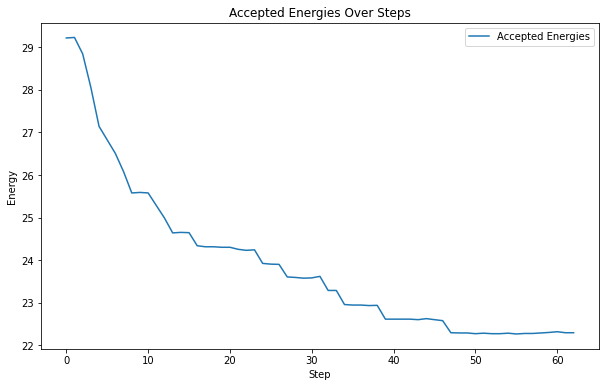

In [15]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()

In [16]:
from npl.monte_carlo import run_monte_carlo as rmc

steps_MC, energies_MC = [], []
for i in range(20):
    start_particle = create_start_particle(4, 1, {'Au': 0.5, 'Pt': 0.5})
    beta, max_steps = 50, 1000
    [best_particle, accepted_energies] = rmc(beta, max_steps, start_particle, energy_calculator, local_feature_classifier)
    
    min_energy, min_step = min(accepted_energies, key=lambda x: x[0])
    energies_MC.append(min_energy)
    steps_MC.append(min_step)

Step: 2000
Lowest energy: 17.32918969342921
Step: 2000
Lowest energy: 17.32918969342921


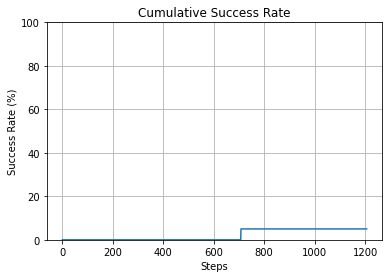

In [17]:
plot_cummulative_success_rate(energies_MC, steps_MC)

In [18]:
view(best_particle.get_ase_atoms(), viewer='x3d')

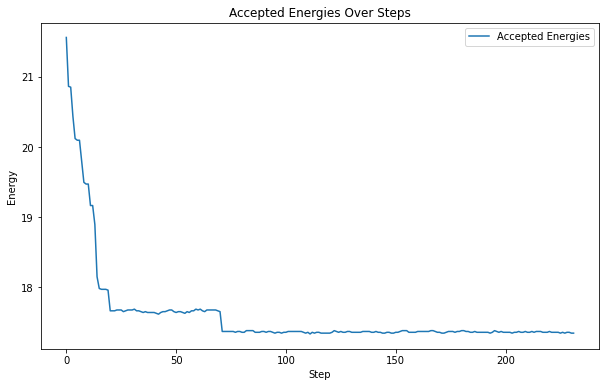

In [19]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()

In [20]:
from npl.optimization.basin_hopping import run_basin_hopping

steps_BH, energies_BH = [], []
for i in range(20):
    start_particle = create_start_particle(4, 1, {'Au': 0.5, 'Pt': 0.5})
    [best_particle, lowest_energies, flip_energy_list] = run_basin_hopping(start_particle,
                                                                        energy_calculator, 
                                                                        total_energies, 
                                                                        100, 
                                                                        5,
                                                                        local_feature_classifier=None)
    energies_BH.append(lowest_energies[-2][0])
    steps_BH.append(lowest_energies[-2][1])

Energy after local_opt: 17.317, lowest 17.317
Energy after local_opt: 17.329, lowest 17.317
Energy after local_opt: 17.341, lowest 17.317
Energy after local_opt: 17.341, lowest 17.317
Energy after local_opt: 17.329, lowest 17.317
Lowest energy: 17.317
Energy after local_opt: 17.329, lowest 17.329
Energy after local_opt: 17.329, lowest 17.317
Energy after local_opt: 17.341, lowest 17.317
Energy after local_opt: 17.341, lowest 17.317
Energy after local_opt: 17.329, lowest 17.317
Lowest energy: 17.317
Energy after local_opt: 17.317, lowest 17.317
Energy after local_opt: 17.329, lowest 17.317
Energy after local_opt: 17.317, lowest 17.317
Energy after local_opt: 17.329, lowest 17.317
Energy after local_opt: 17.317, lowest 17.317
Lowest energy: 17.317
Energy after local_opt: 17.329, lowest 17.329
Energy after local_opt: 17.329, lowest 17.317
Energy after local_opt: 17.329, lowest 17.317
Energy after local_opt: 17.317, lowest 17.317
Energy after local_opt: 17.329, lowest 17.317
Lowest energy:

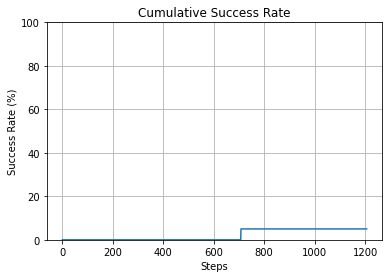

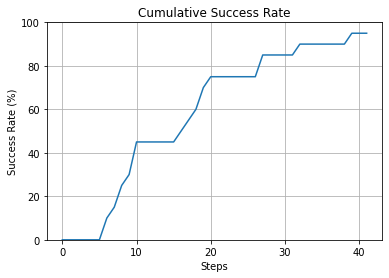

In [21]:
plot_cummulative_success_rate(energies_MC, steps_MC,)
plot_cummulative_success_rate(energies_BH, steps_BH,)